# Tutorial exercises

We again use the wellbeing dataset, to practice running permutation tests.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns

## Colab users

You need to use a more recent version of scipy.stats than the default. To do this run the following code block and *after* it has run, go to the menus at the top of colab and click `runtime-->Restart Runtime`

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
!pip install scipy==1.10.0
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import and view the data

In [3]:
wb = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/WellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65


### Questions

In each case, you will need to decide:
    
* what is our null hypothesis
* what is our alternative hypothesis?

Is it a paired or unpaired test for difference of means, or a correlation test?
* therefore which `permutation_type` is needed, `samples`, `pairings` or `independent`?
        
Is it a one- or two-tailed test?
* therefore which `alternative` hypothesis type is needed, `two-sided`, `greater` or `less`?

What $\alpha$ value will you use?
* what value must $p$ be smaller than, to reject the null hypothesis?
* this is the experimenter's choice but usually 0.05 is used (sometimes 0.001 or 0.001)


#### Test the following hypotheses:
    
1. Wellbeing scores pre- and post-vac are correlated in engineering students
2. There is a difference in the wellbeing scores of PPE students between Beaufort or Lonsdale (before the vacation)?
3. Wellbeing over all students increases across the vacation

#### Slightly harder one:

4. Wellbeing increases more across the vacation for Beaufort students than Lonsdale students

# Answers

## 1. Wellbeing scores pre- and post-vac are correlated in engineering students

1.

Ho: pre- and post vacation scores are not correlated in engineering students.

Ha: pre- and post vacation scores are correlated in engineering students.

This is two-tailed correlation test (paired). Since we are testing 4 hypoteheses in total we perform bonferroni correction for multiple comparisons and test for significance at alpha = 0.05/4=0.0125.

In [72]:
#To simplify our function later, we separate the two arrays of data we want to correlate:

EngineerPre = wb.query('Subject=="engineering"')['Score_preVac']
EngineerPost = wb.query('Subject=="engineering"')['Score_postVac']

#We need to define a function for the permutation test
def correlate(x,y):
  tmp=np.corrcoef(x,y)
  c=tmp[0][1]
  return c

#We can then run the permutation test as below
stats.permutation_test((EngineerPost, EngineerPre), correlate,
                       permutation_type='pairings', alternative='two-sided',n_resamples=10000)


PermutationTestResult(statistic=0.7812255461336072, pvalue=0.00019998000199980003, null_distribution=array([ 0.23137171, -0.03256442,  0.01375394, ...,  0.07993423,
        0.11384869,  0.02686439]))

Conclusion: we may reject the null hypothesis with p<0.0125, suggesting that pre- and post-vacation scores are correlated for engineering students. With a statistic being a pearson r=0.781, this would suggest a positive correlation.

##2. There is a difference in the wellbeing scores of PPE students between Beaufort or Lonsdale (before the vacation)?

Ho: there is no difference in mean pre-vac wellbeing scores of PPE students between Beaufort or Lonsdale.

Ha: there is a difference in mean pre-vac wellbeing scores of PPE students between Beaufort or Lonsdale.

This is a two-tailed test with independent samples, where we test for significance using alpha = 0.05/4 = 0.0125.

In [73]:
#Specifying data:
ppeBeaufort = wb.query('Subject=="PPE"' and 'College == "Beaufort"')['Score_preVac']
ppeLonsdale = wb.query('Subject=="PPE"' and 'College == "Lonsdale"')['Score_preVac']

#defining a function we want for our permutation test. Here we assume normality of scores and test for mean difference.
def mDiff(x,y):
  mDiff=np.mean(x)-np.mean(y)
  return mDiff

#perform permutation test
stats.permutation_test((ppeBeaufort,ppeLonsdale), mDiff,
                       permutation_type='independent', alternative='two-sided', n_resamples=10000)


PermutationTestResult(statistic=1.075831120065942, pvalue=0.43515648435156484, null_distribution=array([-1.22598223,  1.59959703,  1.17231431, ..., -1.07436578,
       -1.0881491 ,  1.29636414]))

Given our permutation test we can not reject the null-hypothesis (p=0.44>0.0125), suggesting that there is no significant difference in mean scores before the vacation for PPE students between Beaufort and Lonsdale.

<Axes: xlabel='Score_preVac', ylabel='Density'>

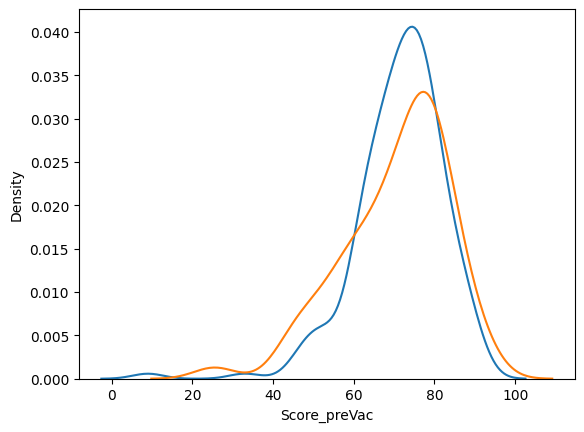

In [74]:
sns.kdeplot(ppeBeaufort)
sns.kdeplot(ppeLonsdale)

## 3. Wellbeing over all students increases across the vacation

Ho: there is no increase in mean wellbeing scores after the vacation.

Ha: there is an increase in mean wellbeing scores after the vacation.

This is a one-sided paired permutation test, requiring type 'samples'.

In [75]:
#We skip data specification as this is straightforward

#define function

def mDiff(x,y):
  return np.mean(x)-np.mean(y)

 #perform permutation test

stats.permutation_test((wb['Score_postVac'],wb['Score_preVac']), mDiff,
                       permutation_type='samples', alternative='greater', n_resamples=10000)

PermutationTestResult(statistic=2.584717607973417, pvalue=9.999000099990002e-05, null_distribution=array([-0.51162791, -0.5448505 , -0.1461794 , ..., -0.33887043,
       -0.62458472, -0.37209302]))

Conclusion: we reject our null-hypothesis with p<0.0125, suggesting that there is an increase in mean wellbeing scores after the vacation.

## 4. Wellbeing increases more across the vacation for Beaufort students than Lonsdale students

This one is 'tricky' because we need to define a new data-column and compare across the two colleges.

Ho: Wellbeing does not increase more on average across the vacation for Beaufort students than Lonsdale students.

Ha: Wellbeing does increase more on average

```
# This is formatted as code
```

 across the vacation for Beaufort students than Lonsdale students.

This is a one-sided independent samples permutation test.

In [76]:
#Use difference as a measure of wellbeing increase:

wb['diff']=wb['Score_postVac']-wb['Score_preVac']

#Specify data

incBeaufort = wb.query('College=="Beaufort"')['diff']
incLonsdale = wb.query('College=="Lonsdale"')['diff']

#Define a function to compare mean differences.
def mDiff(x,y):
  return np.mean(x)-np.mean(y)

#Perform permutation test
stats.permutation_test((incBeaufort,incLonsdale), mDiff,
                       permutation_type='independent', alternative='greater', n_resamples=10000 )


PermutationTestResult(statistic=0.8040571480904846, pvalue=0.24117588241175883, null_distribution=array([ 0.83162378,  0.80405715, -1.95260555, ..., -0.43644107,
        1.38295631, -0.58805751]))

Conclusion: we can not reject our null-hypothesis (p=0.239>0.0125), suggesting that there is no difference on average in the increased wellbeing between Beaufort and Lonsdale.

<Axes: xlabel='diff', ylabel='Density'>

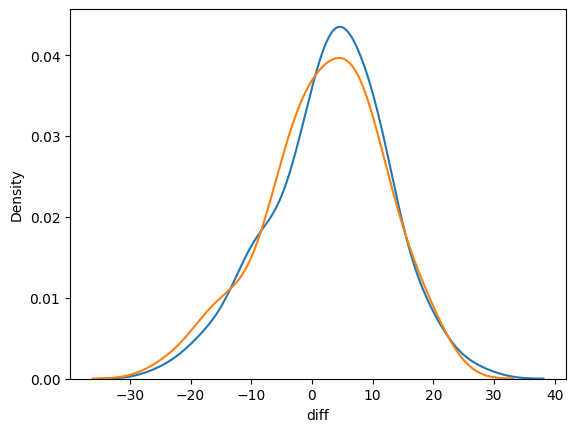

In [77]:
sns.kdeplot(incBeaufort)
sns.kdeplot(incLonsdale)